In [1]:
!pip install torchviz

import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader

  Created wheel for torchviz: filename=torchviz-0.0.2-py3-none-any.whl size=4150 sha256=e9cae3475d7f1c3a39ca94eed7fb4a64bb66d44aef5820ca61800c304c453f5d
  Stored in directory: /root/.cache/pip/wheels/04/38/f5/dc4f85c3909051823df49901e72015d2d750bd26b086480ec2
Successfully built torchviz


In [20]:
def run(model = nn.Sequential(nn.Linear(1, 100), nn.ReLU(), nn.Linear(100, 1)), learning_rate = 0.005,
        number_of_iterations = 10, x_input = [], y_input = [], from_zero_to_one = False):
  x = np.array(x_input)
  x_torch = torch.unsqueeze(torch.from_numpy(x.astype(np.float32)), dim = 1)
  y = np.array(y_input)
  y_torch = torch.unsqueeze(torch.from_numpy(y.astype(np.float32)), dim = 1)

  optimizer = optim.Adam(model.parameters(), lr = learning_rate)
  loss_func = nn.MSELoss()

  losses = []
  for i in range(0, number_of_iterations):
    optimizer.zero_grad()
    loss = loss_func(model(x_torch), y_torch)
    loss.backward()
    optimizer.step()
    losses.append(loss.item())
  print(losses)

  if from_zero_to_one:
    plt.ylim(0, 1)
  plt.plot(x, y, 'g', label = 'Original Function')
  plt.plot(x_torch.detach().numpy().flatten(), model(x_torch).detach().numpy().flatten(), 'r', label = 'Predicted Function')
  plt.show()

[0.06006613373756409, 3.168295383453369, 0.3681641221046448, 0.033631931990385056, 0.185104101896286, 0.21718080341815948, 0.18955744802951813, 0.14268748462200165, 0.09815479815006256, 0.06440265476703644, 0.039691340178251266, 0.022848187014460564, 0.012301616370677948, 0.006876877509057522, 0.005720782093703747, 0.007732005324214697, 0.010988608002662659, 0.013190580531954765, 0.013943038880825043, 0.011461533606052399, 0.009010548703372478, 0.0067105963826179504, 0.00516789685934782, 0.004595136735588312, 0.004720211029052734, 0.005129004828631878, 0.005639647599309683, 0.006017833016812801, 0.006163543555885553, 0.006047036498785019, 0.005695267580449581, 0.005160956643521786, 0.004431645851582289, 0.0038175371009856462, 0.0036354362964630127, 0.0038625854067504406, 0.003927200101315975, 0.003777284175157547, 0.003562446217983961, 0.0033948333002626896, 0.0032997666858136654, 0.0032547092996537685, 0.003228047862648964, 0.003197279991582036, 0.0031554922461509705, 0.00313244503922

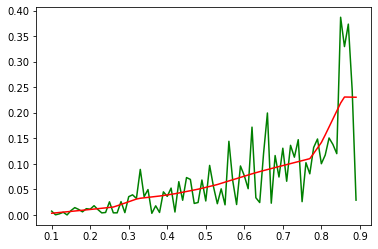

In [13]:
run(model = nn.Sequential(nn.Linear(1, 256), nn.ReLU(), nn.Linear(256, 512), nn.ReLU(), nn.Linear(512, 1)),
    learning_rate = 0.005, number_of_iterations = 1000,
    x_input = [ 0.1, 0.11, 0.12,  0.13,  0.14,  0.15,  0.16,  0.17,  0.18,  0.19,  0.2,  0.21,
  0.22,  0.23,  0.24,  0.25,  0.26,  0.27,  0.28,  0.29,  0.3,   0.31,  0.32,  0.33,
  0.34,  0.35,  0.36,  0.37,  0.38,  0.39,  0.4,   0.41,  0.42,  0.43,  0.44,  0.45,
  0.46,  0.47,  0.48,  0.49,  0.5,   0.51,  0.52,  0.53,  0.54,  0.55,  0.56,  0.57,
  0.58,  0.59,  0.6,   0.61,  0.62,  0.63,  0.64,  0.65,  0.66,  0.67,  0.68,  0.69,
  0.7,   0.71,  0.72,  0.73,  0.74,  0.75,  0.76,  0.77,  0.78,  0.79,  0.8,   0.81,
  0.82,  0.83,  0.84,  0.85,  0.86,  0.87,  0.88,  0.89],
  y_input = [  7.67371504e-03,   4.37169934e-04,   2.38796185e-03,   5.43527404e-03,
   2.53085029e-04,   8.65587439e-03,   1.45490630e-02,   1.09811645e-02,
   6.29101030e-03,   1.24610415e-02,   1.14069459e-02,  1.82928440e-02,
   1.07101901e-02,   4.24106583e-03,   5.02378509e-03, 2.58554146e-02,
   4.33256522e-03,   4.33320325e-03,   2.62303576e-02,   4.74593290e-03,
   3.59497257e-02,   3.95461134e-02,   3.24827040e-02,   8.92475928e-02,
   3.59819123e-02,   4.98243511e-02,   3.37922778e-03,   1.80645589e-02,
   5.04874588e-03,   4.53474677e-02,   3.65218254e-02,   5.27260038e-02,
   5.94004648e-03,   6.52918498e-02,   2.89278853e-02,   7.33100918e-02,
   6.97017174e-02,   2.27328989e-02,   2.45215207e-02,   6.85281724e-02,
   2.75513179e-02,   9.71100979e-02,   5.55168259e-02,   2.21682439e-02,
   5.12670420e-02,   1.99928107e-02,   1.44276555e-01,   6.71492389e-02,
   2.05762237e-02,   9.60205711e-02,   7.70483949e-02,   5.15186129e-02,
   1.71952177e-01,   3.38825950e-02,   2.44665741e-02,   1.20442788e-01,
   1.99624375e-01,   2.31938725e-02,   1.16371939e-01,   7.44134903e-02,
   1.30717781e-01,   6.60966440e-02,   1.36364461e-01,   1.13188898e-01,
   1.47396235e-01,   2.61828086e-02,   1.02391481e-01,   8.06815794e-02,
   1.32130254e-01,   1.48753625e-01,   1.00394590e-01,   1.17316204e-01,
   1.50769410e-01,   1.38108854e-01,   1.20107826e-01,   3.86935559e-01,
   3.29525748e-01,   3.73480007e-01,   2.44826152e-01,   2.91320360e-02])

[0.5875114798545837, 4.919518947601318, 0.0711205005645752, 0.46276044845581055, 0.49025386571884155, 0.45069244503974915, 0.3934687376022339, 0.31022775173187256, 0.19916722178459167, 0.08070050179958344, 0.01838845945894718, 0.10113326460123062, 0.13052821159362793, 0.06937330216169357, 0.022701650857925415, 0.02182845026254654, 0.0420205295085907, 0.057589344680309296, 0.05924195796251297, 0.048472777009010315, 0.0321541503071785, 0.019265787675976753, 0.017763691022992134, 0.027359869331121445, 0.035496607422828674, 0.0330931730568409, 0.02398849092423916, 0.017083900049328804, 0.0163804329931736, 0.019998295232653618, 0.023806340992450714, 0.024863913655281067, 0.022675707936286926, 0.018829910084605217, 0.015821535140275955, 0.015445467084646225, 0.017393428832292557, 0.019418591633439064, 0.01943003199994564, 0.01749059185385704, 0.015405450947582722, 0.01469394937157631, 0.015390250831842422, 0.01644916646182537, 0.01681111752986908, 0.016156932339072227, 0.014980467036366463, 

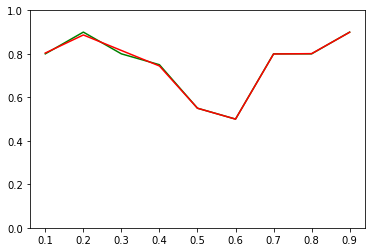

In [23]:
run(model = nn.Sequential(nn.Linear(1, 256), nn.ReLU(), nn.Linear(256, 512), nn.ReLU(), nn.Linear(512, 1024), nn.ReLU(), nn.Linear(1024, 1)),
    learning_rate = 0.005, number_of_iterations = 1000,
    x_input = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
    y_input = [0.8, 0.9, 0.8, 0.75, 0.55, 0.5, 0.8, 0.8, 0.9],
    from_zero_to_one = True)

[1.366349697113037, 1.3281364440917969, 1.2910236120224, 1.2549500465393066, 1.219779133796692, 1.185501217842102, 1.1523226499557495, 1.1200356483459473, 1.0885952711105347, 1.058110237121582, 1.028512716293335, 0.9996415376663208, 0.9715052843093872, 0.9441449642181396, 0.9174774885177612, 0.8915650248527527, 0.8663252592086792, 0.8417084813117981, 0.8178331851959229, 0.7945285439491272, 0.7718054056167603, 0.7496961355209351, 0.7280927300453186, 0.7070146799087524, 0.6864759922027588, 0.6663908958435059, 0.6467301845550537, 0.6274815797805786, 0.6086336970329285, 0.5901755690574646, 0.5720967054367065, 0.554387629032135, 0.5370389819145203, 0.5200421810150146, 0.5033893585205078, 0.48707330226898193, 0.471087247133255, 0.4554251432418823, 0.4400815963745117, 0.42505183815956116, 0.4103315472602844, 0.3959170877933502, 0.38180530071258545, 0.36799371242523193, 0.35448014736175537, 0.3412630558013916, 0.3283413052558899, 0.3157140910625458, 0.3033810257911682, 0.2913420796394348, 0.27

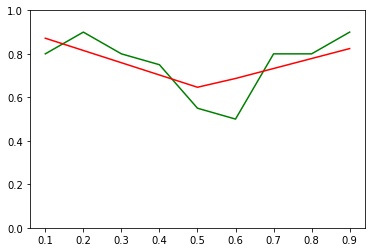

In [24]:
run(model = nn.Sequential(nn.Linear(1, 10), nn.ReLU(), nn.Linear(10, 1)),
    learning_rate = 0.005, number_of_iterations = 1000,
    x_input = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
    y_input = [0.8, 0.9, 0.8, 0.75, 0.55, 0.5, 0.8, 0.8, 0.9],
    from_zero_to_one = True)

[0.11336440593004227, 0.06505092233419418, 0.03423289954662323, 0.020232465118169785, 0.020117035135626793, 0.027954719960689545, 0.036453042179346085, 0.04072940722107887, 0.03977237641811371, 0.03504312410950661, 0.028791610151529312, 0.023058773949742317, 0.01922108232975006, 0.017813675105571747, 0.01855548284947872, 0.0205676332116127, 0.022745953872799873, 0.024166714400053024, 0.024354873225092888, 0.02334021031856537, 0.021535824984312057, 0.01953171007335186, 0.017885291948914528, 0.016959793865680695, 0.016843877732753754, 0.01734938658773899, 0.018115602433681488, 0.018753407523036003, 0.018986372277140617, 0.0187313761562109, 0.018095998093485832, 0.017309175804257393, 0.016620462760329247, 0.01620662957429886, 0.01612033322453499, 0.01628943905234337, 0.016561785712838173, 0.016773706302046776, 0.01681399531662464, 0.01665463298559189, 0.016352437436580658, 0.01601415127515793, 0.015742914751172066, 0.015601183287799358, 0.015590912662446499, 0.015661368146538734, 0.015737

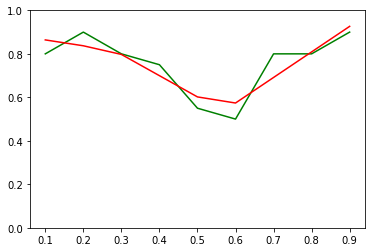

In [25]:
run(model = nn.Sequential(nn.Linear(1, 32), nn.ReLU(), nn.Linear(32, 1)),
    learning_rate = 0.005, number_of_iterations = 1000,
    x_input = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
    y_input = [0.8, 0.9, 0.8, 0.75, 0.55, 0.5, 0.8, 0.8, 0.9],
    from_zero_to_one = True)

[0.05499610677361488, 0.036495063453912735, 0.04012177512049675, 0.03682482987642288, 0.028529319912195206, 0.022514544427394867, 0.02105225808918476, 0.021412841975688934, 0.020289136096835136, 0.01749771647155285, 0.015041932463645935, 0.014458264224231243, 0.015392999164760113, 0.016202889382839203, 0.015866287052631378, 0.014836367219686508, 0.014151841402053833, 0.014342346228659153, 0.014911855570971966, 0.015045884996652603, 0.014463696628808975, 0.013600149191915989, 0.013017591089010239, 0.01285727322101593, 0.012769133783876896, 0.012393631972372532, 0.011721092276275158, 0.01109329517930746, 0.010768923908472061, 0.010699265636503696, 0.010596810840070248, 0.010312182828783989, 0.009939122945070267, 0.009680242277681828, 0.00958614144474268, 0.009537983685731888, 0.00936044380068779, 0.009055612608790398, 0.00879486370831728, 0.008638967759907246, 0.008535828441381454, 0.008380983024835587, 0.008156519383192062, 0.007977824658155441, 0.007877444848418236, 0.00779144652187824

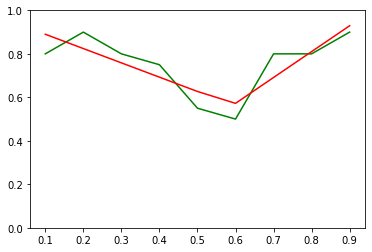

In [26]:
run(model = nn.Sequential(nn.Linear(1, 100), nn.ReLU(), nn.Linear(100, 1)),
    learning_rate = 0.005, number_of_iterations = 1000,
    x_input = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
    y_input = [0.8, 0.9, 0.8, 0.75, 0.55, 0.5, 0.8, 0.8, 0.9],
    from_zero_to_one = True)

[0.08286827802658081, 1.4269558191299438, 0.13331089913845062, 0.29987072944641113, 0.765489399433136, 0.48981353640556335, 0.08305218815803528, 0.05988217145204544, 0.3073984384536743, 0.4014238119125366, 0.24212336540222168, 0.05166339874267578, 0.027931256219744682, 0.145612433552742, 0.2277827262878418, 0.17788618803024292, 0.06557925045490265, 0.012065509334206581, 0.05438259616494179, 0.12039714306592941, 0.12589770555496216, 0.06944384425878525, 0.01715281791985035, 0.019279152154922485, 0.05874811112880707, 0.08051890879869461, 0.05926680564880371, 0.0223503727465868, 0.010239455848932266, 0.02913171797990799, 0.049037832766771317, 0.04400191828608513, 0.021690793335437775, 0.008870436809957027, 0.016908325254917145, 0.030673891305923462, 0.030802233144640923, 0.017830094322562218, 0.00833471491932869, 0.012048921547830105, 0.020797958597540855, 0.021502915769815445, 0.013552363961935043, 0.007600865326821804, 0.010049679316580296, 0.015389642678201199, 0.015298409387469292, 0.

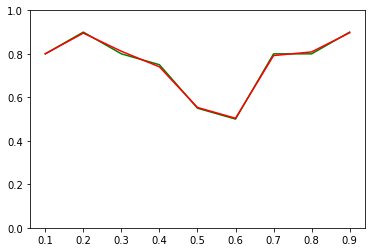

In [27]:
run(model = nn.Sequential(nn.Linear(1, 1000), nn.ReLU(), nn.Linear(1000, 1)),
    learning_rate = 0.005, number_of_iterations = 1000,
    x_input = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
    y_input = [0.8, 0.9, 0.8, 0.75, 0.55, 0.5, 0.8, 0.8, 0.9],
    from_zero_to_one = True)

[0.8692775368690491, 0.049289241433143616, 0.1849391907453537, 0.4239644706249237, 0.33913421630859375, 0.13475275039672852, 0.019453730434179306, 0.0524376779794693, 0.15145546197891235, 0.20048655569553375, 0.1628722846508026, 0.08248036354780197, 0.02317892760038376, 0.019411463290452957, 0.05805327370762825, 0.09625645726919174, 0.10055897384881973, 0.07094623148441315, 0.03293777257204056, 0.013395160436630249, 0.020928073674440384, 0.0425560399889946, 0.05699633061885834, 0.0524875670671463, 0.03405934199690819, 0.01659710519015789, 0.01191297359764576, 0.020093999803066254, 0.031131161376833916, 0.0344451479613781, 0.02756427600979805, 0.016804680228233337, 0.010668497532606125, 0.012530997395515442, 0.018621187657117844, 0.02227623574435711, 0.020060943439602852, 0.014193122275173664, 0.009737487882375717, 0.00976809486746788, 0.012950289994478226, 0.015376867726445198, 0.014479640871286392, 0.011180364526808262, 0.00848731305450201, 0.00838476698845625, 0.010118557140231133, 0

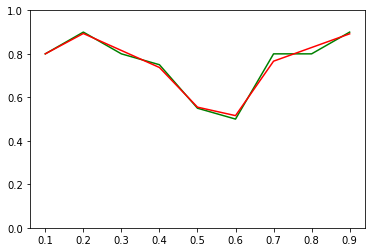

In [28]:
run(model = nn.Sequential(nn.Linear(1, 500), nn.ReLU(), nn.Linear(500, 1)),
    learning_rate = 0.005, number_of_iterations = 1000,
    x_input = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
    y_input = [0.8, 0.9, 0.8, 0.75, 0.55, 0.5, 0.8, 0.8, 0.9],
    from_zero_to_one = True)

[0.5884578227996826, 0.10318295657634735, 0.4484274089336395, 0.23315808176994324, 0.022831814363598824, 0.09158371388912201, 0.21784251928329468, 0.1818627268075943, 0.06208235025405884, 0.012757486663758755, 0.06654870510101318, 0.12542542815208435, 0.1094844713807106, 0.04721292108297348, 0.012562699615955353, 0.03369865566492081, 0.07060109078884125, 0.07327836751937866, 0.04111088067293167, 0.012834664434194565, 0.01604454591870308, 0.03826402872800827, 0.0474821999669075, 0.03274744004011154, 0.013046909123659134, 0.010036716237664223, 0.022464709356427193, 0.03119281306862831, 0.024896390736103058, 0.012329500168561935, 0.0084650544449687, 0.015336728654801846, 0.02143803983926773, 0.018164101988077164, 0.010207729414105415, 0.0074888672679662704, 0.011677952483296394, 0.015316377393901348, 0.01297011785209179, 0.008053893223404884, 0.006911266595125198, 0.009863011538982391, 0.011678915470838547, 0.009576654992997646, 0.006681802216917276, 0.006739269010722637, 0.00874680653214

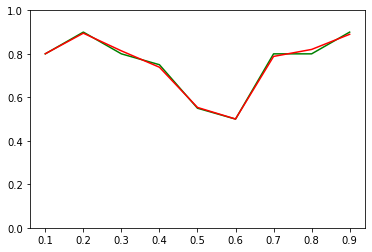

In [29]:
run(model = nn.Sequential(nn.Linear(1, 750), nn.ReLU(), nn.Linear(750, 1)),
    learning_rate = 0.005, number_of_iterations = 1000,
    x_input = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
    y_input = [0.8, 0.9, 0.8, 0.75, 0.55, 0.5, 0.8, 0.8, 0.9],
    from_zero_to_one = True)

[0.3333072066307068, 0.36599764227867126, 0.26523277163505554, 0.019068889319896698, 0.1307315081357956, 0.21657903492450714, 0.10281897336244583, 0.014348568394780159, 0.06587987393140793, 0.12963055074214935, 0.09491024911403656, 0.026133114472031593, 0.01932188868522644, 0.06419643014669418, 0.08024587482213974, 0.04541317746043205, 0.012510332278907299, 0.021705202758312225, 0.048369333148002625, 0.04830505698919296, 0.023232625797390938, 0.009402336552739143, 0.02133321575820446, 0.03510172665119171, 0.028541790321469307, 0.012488668784499168, 0.00963306799530983, 0.020084278658032417, 0.02462143637239933, 0.01607878878712654, 0.00799235887825489, 0.011078670620918274, 0.01757798157632351, 0.015920544043183327, 0.009067500941455364, 0.007610003929585218, 0.01208675466477871, 0.013644780963659286, 0.00959980208426714, 0.006776634603738785, 0.008943081833422184, 0.011142000555992126, 0.009230176918208599, 0.006625714246183634, 0.007390815299004316, 0.009247253648936749, 0.0084572462

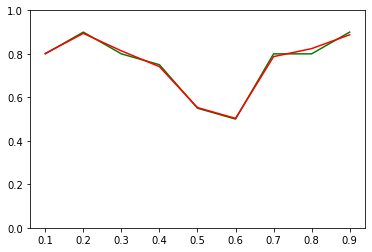

In [30]:
run(model = nn.Sequential(nn.Linear(1, 850), nn.ReLU(), nn.Linear(850, 1)),
    learning_rate = 0.005, number_of_iterations = 1000,
    x_input = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
    y_input = [0.8, 0.9, 0.8, 0.75, 0.55, 0.5, 0.8, 0.8, 0.9],
    from_zero_to_one = True)

[0.5570341348648071, 0.38285911083221436, 0.4504035413265228, 0.06295806914567947, 0.09479274600744247, 0.2828308045864105, 0.20496666431427002, 0.04002529755234718, 0.03616177290678024, 0.14262399077415466, 0.1607077568769455, 0.07370882481336594, 0.01377413235604763, 0.04736994579434395, 0.1012062206864357, 0.09002066403627396, 0.03506986424326897, 0.01155571173876524, 0.039530105888843536, 0.06648830324411392, 0.051308710128068924, 0.018134592100977898, 0.011399995535612106, 0.03230112046003342, 0.044044703245162964, 0.02923564426600933, 0.010722517967224121, 0.0129043348133564, 0.027070026844739914, 0.028865089640021324, 0.016026385128498077, 0.008054249919950962, 0.014219479635357857, 0.02146103046834469, 0.01738174818456173, 0.00881834328174591, 0.008428501896560192, 0.014389998279511929, 0.015415872447192669, 0.009894960559904575, 0.006894109304994345, 0.010039838962256908, 0.012538304552435875, 0.009813690558075905, 0.006623312830924988, 0.00774782570078969, 0.01003022678196430

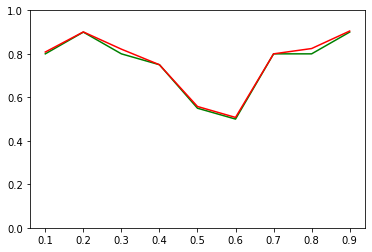

In [31]:
run(model = nn.Sequential(nn.Linear(1, 950), nn.ReLU(), nn.Linear(950, 1)),
    learning_rate = 0.005, number_of_iterations = 1000,
    x_input = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
    y_input = [0.8, 0.9, 0.8, 0.75, 0.55, 0.5, 0.8, 0.8, 0.9],
    from_zero_to_one = True)

[0.4730479419231415, 0.49817216396331787, 0.37611302733421326, 0.022255532443523407, 0.16766315698623657, 0.29775702953338623, 0.14482790231704712, 0.014524757862091064, 0.0800771415233612, 0.17401963472366333, 0.13263362646102905, 0.03538547456264496, 0.019505362957715988, 0.08077563345432281, 0.10846491903066635, 0.06339208781719208, 0.0146229462698102, 0.022952590137720108, 0.06074909493327141, 0.06511121988296509, 0.03176511451601982, 0.009393146261572838, 0.02331552468240261, 0.0443204902112484, 0.03857541084289551, 0.016202285885810852, 0.009286467917263508, 0.02274984121322632, 0.03140072152018547, 0.021434670314192772, 0.008836700581014156, 0.01093981321901083, 0.020471623167395592, 0.020310690626502037, 0.011032755486667156, 0.007193941157311201, 0.01269625499844551, 0.01633097045123577, 0.01174685824662447, 0.006777613423764706, 0.008644497022032738, 0.012388628907501698, 0.01086498610675335, 0.006828378885984421, 0.0067989407107234, 0.009565015323460102, 0.009434965439140797

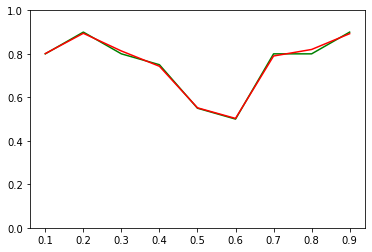

In [32]:
run(model = nn.Sequential(nn.Linear(1, 1000), nn.ReLU(), nn.Linear(1000, 1)),
    learning_rate = 0.005, number_of_iterations = 1000,
    x_input = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
    y_input = [0.8, 0.9, 0.8, 0.75, 0.55, 0.5, 0.8, 0.8, 0.9],
    from_zero_to_one = True)